In [1]:
import h5py
import numpy as np
import anndata

# Load the file
adata = anndata.read_h5ad('C:/Users/hafsa/OneDrive - Imperial College London/PhD/Public datasets/NK studies datasets/adata_crinier_post_scvi.h5ad')

C:\Users\hafsa\AppData\Roaming\Python\Python39\site-packages\anndata\_core\anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [2]:
adata = adata[adata.obs['Cell labels'] != 'Unknown']

In [3]:
latent_space = adata.obsm['X_scVI']

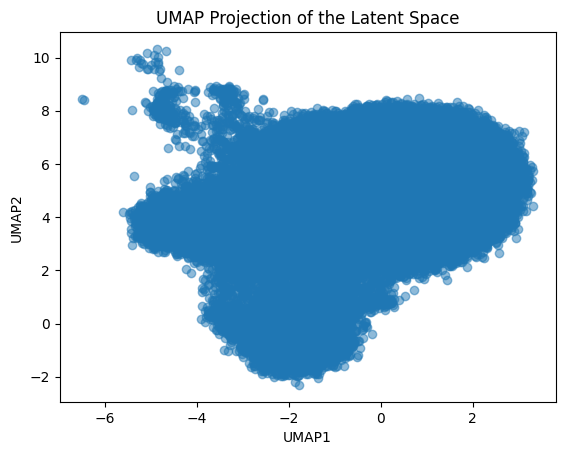

In [4]:
import matplotlib.pyplot as plt
umap_embedding = adata.obsm['X_umap']
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], alpha=0.5)
plt.title('UMAP Projection of the Latent Space')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()


In [5]:
# colouring the umap by cell labels

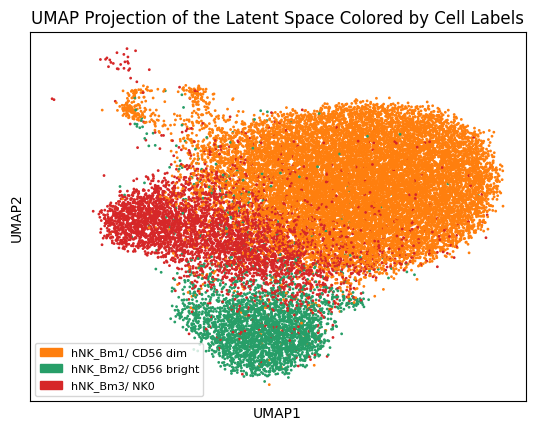

In [11]:
from matplotlib.patches import Patch
# Define the specific colors you want to use
specific_colors = ['#ff7f0e', '#279e68', '#d62728']

# Extract unique labels
# Assuming 'Cell labels' is the column with cell type information
cell_labels = adata.obs['Cell labels']

# Extract unique labels
unique_labels = np.unique(cell_labels)

# Map each unique label to a specific color
label_color_map = {label: color for label, color in zip(unique_labels, specific_colors)}

# Create a list of colors for each cell based on its label
cell_colors = [label_color_map[label] for label in cell_labels]

# Plot UMAP
plt.title('UMAP Projection of the Latent Space Colored by Cell Labels')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.xticks([])
plt.yticks([])
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=cell_colors, s=1)

# Create legend handles
legend_handles = [Patch(color=label_color_map[label], label=label) for label in unique_labels]

# Add the legend to the plot at the bottom left
plt.legend(handles=legend_handles, fontsize=8, loc='lower left')

plt.show()

C:\ProgramData\Anaconda3\envs\slingshot_ti_env\lib\site-packages\pyslingshot\util.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isint(cluster_labels[0]):
C:\ProgramData\Anaconda3\envs\slingshot_ti_env\lib\site-packages\pyslingshot\util.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif isstr(cluster_labels[0]):


Lineages: [Lineage[0, 2, 1]]


  0%|                                                                         | 0/10 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\slingshot_ti_env\lib\site-packages\pyslingshot\slingshot.py:333: RuntimeWarning: invalid value encountered in divide
  cell_weights = z_prime / np.nanmax(z_prime, axis=1, keepdims=True) #rowMins(D) / D
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 10%|██████▌                                                          | 1/10 [01:08<10:15, 68.34s/it]

Reversing from leaf to root


C:\ProgramData\Anaconda3\envs\slingshot_ti_env\lib\site-packages\pyslingshot\slingshot.py:333: RuntimeWarning: invalid value encountered in divide
  cell_weights = z_prime / np.nanmax(z_prime, axis=1, keepdims=True) #rowMins(D) / D
 20%|█████████████                                                    | 2/10 [02:31<10:15, 76.92s/it]

Reversing from leaf to root


 30%|███████████████████▌                                             | 3/10 [03:55<09:20, 80.12s/it]

Reversing from leaf to root


 40%|██████████████████████████                                       | 4/10 [05:25<08:25, 84.21s/it]

Reversing from leaf to root


 50%|████████████████████████████████▌                                | 5/10 [06:38<06:40, 80.07s/it]

Reversing from leaf to root


 60%|███████████████████████████████████████                          | 6/10 [08:06<05:30, 82.70s/it]

Reversing from leaf to root


 70%|█████████████████████████████████████████████▌                   | 7/10 [09:39<04:18, 86.26s/it]

Reversing from leaf to root


 80%|████████████████████████████████████████████████████             | 8/10 [11:00<02:48, 84.50s/it]

Reversing from leaf to root


 90%|██████████████████████████████████████████████████████████▌      | 9/10 [12:29<01:25, 85.99s/it]

Reversing from leaf to root


100%|████████████████████████████████████████████████████████████████| 10/10 [13:57<00:00, 83.75s/it]

Reversing from leaf to root


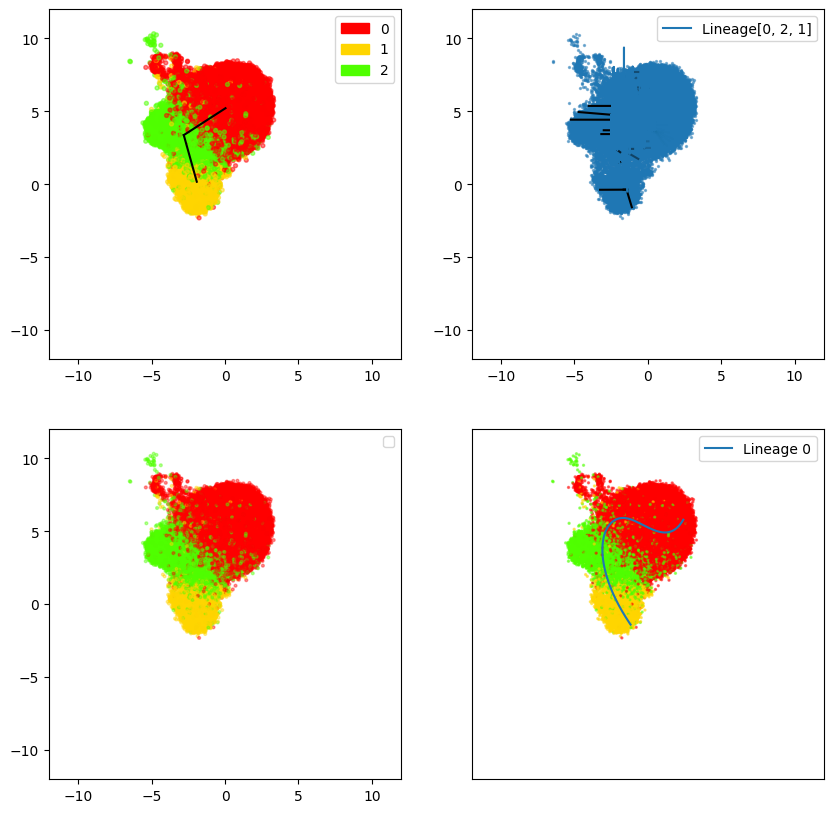

In [14]:
# running slingshot
from pyslingshot import Slingshot

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
custom_xlim = (-12, 12)
custom_ylim = (-12, 12)
plt.setp(axes, xlim=custom_xlim, ylim=custom_ylim)


slingshot = Slingshot(adata, celltype_key="Cell labels", obsm_key="X_umap", debug_level='verbose')

slingshot.fit(num_epochs=10, debug_axes=axes)